In [1]:
from data.utils.data_processing import load_historical_weather_data
import matplotlib.pyplot as plt
import seaborn as sns

data = load_historical_weather_data('data/open-meteo-wind-temp-rain.csv')

<Axes: >

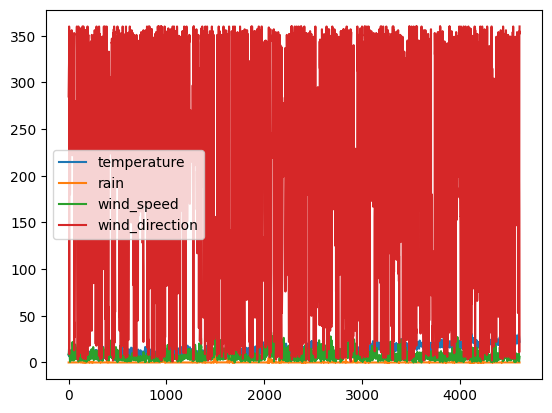

In [2]:
data.plot()

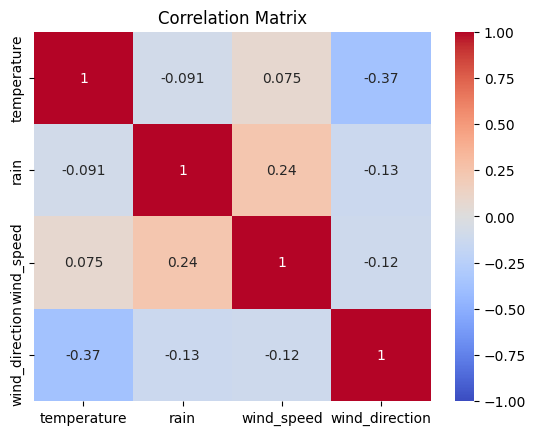

In [8]:
corr = data.drop('time', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [40]:
data.describe()

,temperature,rain,wind_speed,wind_direction
count,4610.000000,4610.000000,4610.000000,4610.000000
mean,14.222343,0.159349,7.760087,205.883948
std,5.467943,0.748027,4.845152,123.944363
min,1.600000,0.000000,0.000000,1.000000
25%,10.000000,0.000000,4.400000,96.000000
50%,13.800000,0.000000,6.500000,194.000000
75%,18.300000,0.000000,9.900000,342.000000
max,30.700000,15.600000,36.700000,360.000000


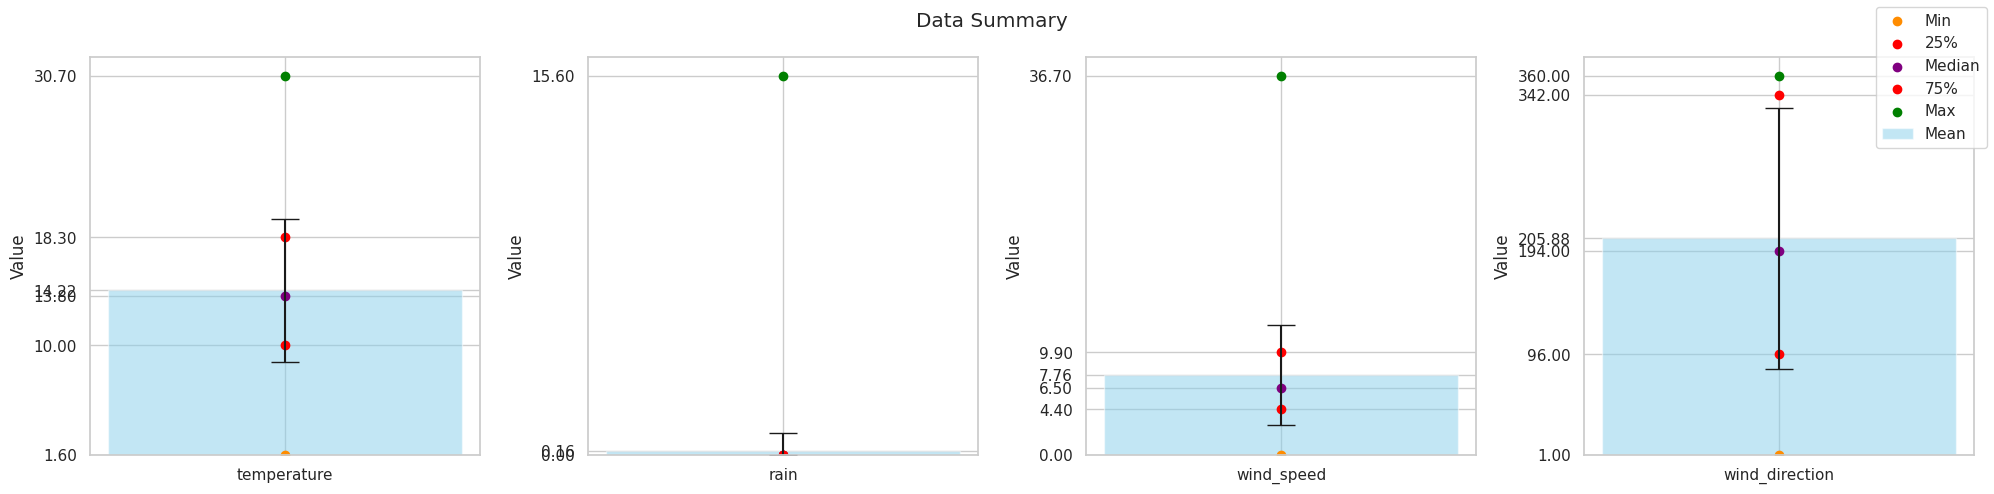

In [77]:
# Plotting
fig, ax = plt.subplots(ncols=4, figsize=(20, 5))

# get descriptions
desc = []
for col in data.drop('time', axis=1).columns:
    desc.append(data[col].describe())
    # print(data[col].describe())

# Extracting statistics
i = 0
for d in desc:
    mean = d['mean']
    std = d['std']
    min_val = d['min']
    max_val = d['max']
    percentile_25 = d['25%']
    median = d['50%']
    percentile_75 = d['75%']

    ax[i].ylim = ([0, max_val + std])
    
    # Define the points where you want the ticks
    yticks = [min_val, percentile_25, median, percentile_75, max_val, mean]
    yticks = list(set(yticks))  # Remove duplicates if any
    yticks.sort()  # Sort the list to ensure ticks are in ascending order

    # Optionally, define custom labels for these ticks
    yticklabels = [f"{val:.2f}" for val in yticks]  # Format the tick labels to two decimal places

    # Set the ticks and labels on the y-axis
    ax[i].set_yticks(yticks)
    ax[i].set_yticklabels(yticklabels)

    # Mean as a bar plot
    lower_error = min(mean - min_val, std)  # Lower error is the minimum between mean-min_val and std, but not less than 0
    upper_error = std  # Upper error remains as std

    ax[i].bar(d.name, mean - min_val, bottom=min_val, yerr=[[lower_error], [upper_error]], alpha=0.5, color='skyblue', capsize=10)

    # # Min, max, and percentiles as scatter points
    # ax[i].scatter([d.name]*4, [min_val, percentile_25, median, percentile_75], color='darkorange')
    ax[i].scatter(d.name, min_val, color='darkorange')  # Max value in red to highlight
    ax[i].scatter(d.name, percentile_25, color='red')  # Max value in red to highlight
    ax[i].scatter(d.name, median, color='purple')  # Max value in red to highlight
    ax[i].scatter(d.name, percentile_75, color='red')  # Max value in red to highlight
    ax[i].scatter(d.name, max_val, color='green')  # Max value in red to highlight

    # Customizing the plot
    ax[i].set_ylabel('Value')
    # ax[i].set_title('Summary Statistics')

    i += 1

# Adding a legend
fig.legend(['Min', '25%', 'Median', '75%', 'Max', 'Mean'], loc='upper right')
fig.suptitle('Data Summary')

plt.tight_layout()
plt.show()